# Zad1
Porównać w języku Julia reprezentację bitową liczby 1/3 dla `Float16`, `Float32`, `Float64` oraz liczby, 
która jest inicjalizowana jako `Float16`, a potem rzutowana na `Float64`.

In [9]:
decode64(x::Float64) =  (b=bitstring(x); (b[1], b[2:12], b[12:64]))
decode32(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode16(x::Float16) =  (b=bitstring(x); (b[1], b[2:6], b[7:16]))

decode16 (generic function with 1 method)

In [10]:
a = Float64(1/3)
b = Float32(1/3)
c = Float16(1/3)

Float16(0.3333)

In [11]:
println(
    decode64(Float64(a)),"\n",
    decode64(Float64(b)), "\n",
    decode64(Float64(c))
    )

('0', "01111111101", "10101010101010101010101010101010101010101010101010101")
('0', "01111111101", "10101010101010101010101100000000000000000000000000000")
('0', "01111111101", "10101010101000000000000000000000000000000000000000000")


In [12]:
println(
    decode32(Float32(b)),"\n",
    decode32(Float32(c)),
    )

('0', "01111101", "01010101010101010101011")
('0', "01111101", "01010101010000000000000")


In [13]:
decode16(Float16(c))

('0', "01101", "0101010101")

# Zad2
Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

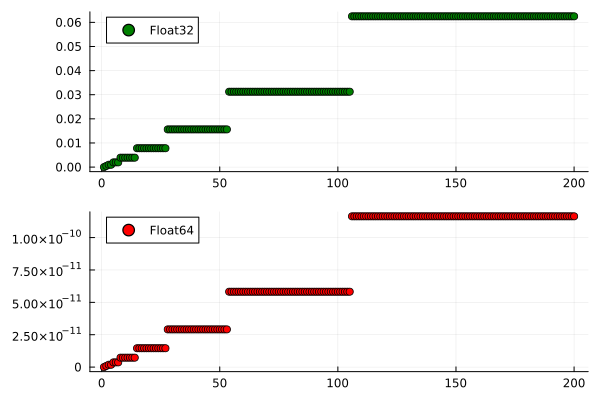

In [14]:
using Plots
result = Float32[]
result64 = Float64[]
for i = 1:5000:1000000
    push!(result, eps(Float32(i)))
    push!(result64, eps(Float64(i)))
end


scatter([result, result64],layout = (2,1), label = ["Float32" "Float64"], color = ["green" "red"])

# Zad3

Jedną z bibliotek numerycznych, jaką dodatkowo będziemy używać na zajęciach jest <a href="http://www.gnu.org/software/gsl/gsl.html">GSL</a> (język C). Opis <a href="https://www.gnu.org/software/gsl/doc/html/usage.html"> jak używać </a>. Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Kod załączyć jako komórka Markdown sformatowana jako C ([link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code)). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).

```C
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>
#include <gsl/gsl_math.h>

int main()
{
    gsl_ieee_env_setup();
    float number = 1e-34;

    while (number > 0)
    {
        number /= (2.0);
        gsl_ieee_printf_float(&number);
        printf("\n");
    }
    return 0;
}
```
#### Wynik
```
 1.00001001110110000111101*2^-1140.000000
 1.00001001110110000111101*2^-1150.000000
 1.00001001110110000111101*2^-1160.000000
 1.00001001110110000111101*2^-1170.000000
 1.00001001110110000111101*2^-1180.000000
 1.00001001110110000111101*2^-1190.000000
 1.00001001110110000111101*2^-1200.000000
 1.00001001110110000111101*2^-1210.000000
 1.00001001110110000111101*2^-1220.000000
 1.00001001110110000111101*2^-1230.000000
 1.00001001110110000111101*2^-1240.000000
 1.00001001110110000111101*2^-1250.000000
 1.00001001110110000111101*2^-1260.000000
 0.10000100111011000011110*2^-1260.000000
 0.01000010011101100001111*2^-1260.000000
 0.00100001001110110001000*2^-1260.000000
 0.00010000100111011000100*2^-1260.000000
 0.00001000010011101100010*2^-1260.000000
 0.00000100001001110110001*2^-1260.000000
 0.00000010000100111011000*2^-1260.000000
 0.00000001000010011101100*2^-1260.000000
 0.00000000100001001110110*2^-1260.000000
 0.00000000010000100111011*2^-1260.000000
 0.00000000001000010011110*2^-1260.000000
 0.00000000000100001001111*2^-1260.000000
 0.00000000000010000101000*2^-1260.000000
 0.00000000000001000010100*2^-1260.000000
 0.00000000000000100001010*2^-1260.000000
 0.00000000000000010000101*2^-1260.000000
 0.00000000000000001000010*2^-1260.000000
 0.00000000000000000100001*2^-1260.000000
 0.00000000000000000010000*2^-1260.000000
 0.00000000000000000001000*2^-1260.000000
 0.00000000000000000000100*2^-1260.000000
 0.00000000000000000000010*2^-1260.000000
 0.00000000000000000000001*2^-1260.000000
 00.000000
 ```

### Zad4
Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Wszystkie punkty przedstawić w postaci notatnika Julii.

In [15]:
function nonstable(a, b, c)
    if a == 0
        println("This is not a quadratic equation.")
        return
    else
        delta = b^2 - 4*a*c
        if delta < 0
            println("The equation has no real roots.")
        elseif delta == 0
            x = -b / (2*a)
            println("Unstable root: $x ")
        else
            x1 = (-b - sqrt(delta)) / (2*a)
            x2 = (-b + sqrt(delta)) / (2*a)
            println("Unstable: x1:$x1, x2:$x2")
        end
    end
end

function stabilized(a, b, c)
    if a == 0
        println("This is not a quadratic equation.")
        return
    end

    delta = b^2 - 4*a*c
    
    if delta < 0
        println("The equation has no real roots.")
        return
    end
    if delta == 0
        x = -b / (2*a)
        println("Unstable root: $x ")
        return
    end
    
    q = (-b + sign(-b)*sqrt(delta)) / 2
    x3 = q / a
    x4 = c / q
    println("Stable:   x3:$x3, x4:$x4")
end

stabilized (generic function with 1 method)

In [16]:
examples = [(0.000000000000000000000000000000001, 0.1, 0.000000000000000000000000000000001),
            (1e-16, 1e8, 1),   
            (1, 100000000.0, 1),    
            (0.1, -1e10, 1e-16)]


for (a, b, c) in examples
    println("       ",a, "x^2 + ",b, "x + $c")
    nonstable(a, b, c)
    stabilized(a, b, c)
    println("-" ^ 45)
end

       1.0e-33x^2 + 0.1x + 1.0e-33
Unstable: x1:-1.0e32, x2:0.0
Stable:   x3:-1.0e32, x4:-1.0e-32
---------------------------------------------
       1.0e-16x^2 + 1.0e8x + 1
Unstable: x1:-1.0e24, x2:0.0
Stable:   x3:-1.0e24, x4:-1.0e-8
---------------------------------------------
       1x^2 + 1.0e8x + 1
Unstable: x1:-1.0e8, x2:-7.450580596923828e-9
Stable:   x3:-1.0e8, x4:-1.0e-8
---------------------------------------------
       0.1x^2 + -1.0e10x + 1.0e-16
Unstable: x1:0.0, x2:1.0e11
Stable:   x3:1.0e11, x4:1.0e-26
---------------------------------------------


Funkcja "nonstable" oblicza wzór kwadratowy bezpośrednio dwa razy. Może to prowadzić do niestabilności numerycznej, ponieważ błąd względny odejmowania może być duży z powodu różnicy wartości liczb, które są odejmowane. W przypadku odejmowania liczb, z których jedna jest znacznie większa niż druga, może dojść do utraty cyfr znaczących, co prowadzi do błędnego wyniku.